# Random Forest

## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Criando uma Decision Tree

## Lendo Base de dados

#### Carrega o dataset

In [2]:

irisData = pd.read_csv("iris_data.csv")

In [3]:

print(irisData.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [4]:

print(irisData.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [5]:
# Correlação
print(irisData.corr())

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


##Separando dados


In [6]:

features = irisData[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
targetVariables = irisData.Class

In [7]:

featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, 
                                                                      targetVariables, 
                                                                      test_size = .2)

## Criação do modelo

In [9]:

clf = DecisionTreeClassifier(criterion="entropy")

In [10]:
print(clf)

DecisionTreeClassifier(criterion='entropy')


In [11]:
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [12]:
print (confusion_matrix(targetTest, previsoes))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [13]:
# Obs: Dependendo da versão do Scikit-Learn, a acurácia pode ser diferente
print (accuracy_score(targetTest, previsoes))

1.0


## Random Forest Classifier - I

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

### Gera o dataset

In [15]:

digitos = load_digits()

### Aplica Escala nos dados

In [16]:

data = scale(digitos.data)

In [17]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [18]:
data.shape

(1797, 64)

### Obtém número de observações e número de atributos

In [19]:

n_observ, n_features = data.shape

In [20]:
n_observ

1797

In [21]:
n_features

64

In [22]:
# Obtém os labels
n_digits = len(np.unique(digitos.target))
labels = digitos.target

In [23]:
labels

array([0, 1, 2, ..., 8, 9, 8])

### Cria o classificador

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [24]:
clf = RandomForestClassifier(n_estimators  = 10)

Os 4 principais parâmetros em Modelos de Random Forest são:

- n_estimators - quanto maior, melhor!

- max depth - o padrão é 'none' e nesse caso árvores completas são criadas. Ajustando esse parâmetro pode ajudar a evitar overfitting.

- max_features - diferentes valores devem ser testados, pois este parâmetro impacta na forma como os modelos RF distribuem os atributos pelas árvores.

- criterion - define a forma como o algoritmo fará a divisão dos atributos e a classificação dos nós em cada árvore.

### Construção do modelo

In [25]:
clf = clf.fit(data, labels)

In [26]:
clf

RandomForestClassifier(n_estimators=10)

In [27]:
scores = clf.score(data,labels)

In [28]:
print(scores)

0.9988870339454646


### Extraindo a importância

In [29]:
importances = clf.feature_importances_
indices = np.argsort(importances)

### Plot da Importância dos Atributos

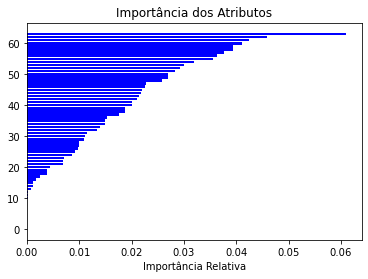

In [30]:

plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')

plt.xlabel('Importância Relativa')
plt.show()

## Random Forest Classifier - II

In [31]:
!pip install treeinterpreter

In [32]:
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

### Carrega o dataset

In [33]:

iris = load_iris()

### Cria o classificador

In [34]:

rf = RandomForestClassifier(max_depth = 4)

In [35]:
# Obtém os índices a partir do comprimento da variável target
idx = list(range(len(iris.target)))

In [36]:
idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [37]:
# Randomiza o ínidce
np.random.shuffle(idx)

### Cria o modelo

In [38]:
rf.fit(iris.data[idx][:100], iris.target[idx][:100])

RandomForestClassifier(max_depth=4)

In [39]:
instance = iris.data[idx][100:101]

In [40]:
prediction, bias, contributions = ti.predict(rf, instance)
print ("Previsões", prediction)
print ("Contribuição dos Atributos:")
for item, feature in zip(contributions[0], iris.feature_names):
    print (feature, item)

Previsões [[0.         0.53592983 0.46407017]]
Contribuição dos Atributos:
sepal length (cm) [-0.06269667 -0.05059154  0.11328821]
sepal width (cm) [-0.00103448 -0.02067523  0.02170971]
petal length (cm) [-0.17258884 -0.02683176  0.1994206 ]
petal width (cm) [-0.11808001  0.34192836 -0.22384836]


## Random Forest Regressor

### Random Forest Regressor - composto por árvores de decisão de regressão

http://www.boardgamegeek.com/

Nosso dataset possui registros de 81.312 Games Boards como esse: http://www.boardgamegeek.com/boardgame/167791/terraforming-mars

### Colunas no dataset:

https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek

name – name of the board game.

playingtime – the playing time (given by the manufacturer).

minplaytime – the minimum playing time (given by the manufacturer).

maxplaytime – the maximum playing time (given by the manufacturer).

minage – the minimum recommended age to play.

users_rated – the number of users who rated the game.

average_rating – the average rating given to the game by users. (0-10)

total_weights – Number of weights given by users.  Weight is a subjective measure that is made up by BoardGameGeek. 

It’s how “deep” or involved a game is. Here’s a full explanation.

average_weight – the average of all the subjective weights (0-5).

### Importando as Bibliotecas 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

### Carregando o dataset

In [43]:
games = pd.read_csv("games_data.csv")

In [44]:
# Imprimindo o nome das colunas
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [45]:
print(games.shape)

(81312, 20)


### Histograma com a média de avaliações

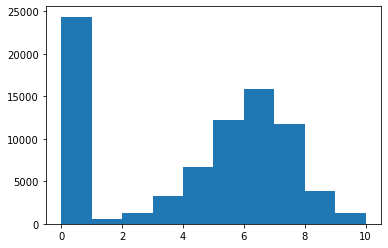

In [46]:
plt.hist(games["average_rating"])
plt.show()

### Visualizando as observações com rating igual a 0

In [47]:
games[games["average_rating"] == 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


Retornando a primeira linha do subset do dataframe, onde o índice é igual a 0.

In [48]:

print(games[games["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object


Retornando a primeira linha do subset do dataframe, onde o índice é maior que 0.

In [49]:
# 
print(games[games["average_rating"] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime                         180.0
minplaytime                         180.0
maxplaytime                         180.0
minage                               13.0
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


Removendo as linhas sem avaliação de usuários.

In [50]:
# 
games = games[games["users_rated"] > 0]

Removendo linhas com valores missing

In [51]:
# 
games = games.dropna(axis = 0)

Histograma com a média de avaliações

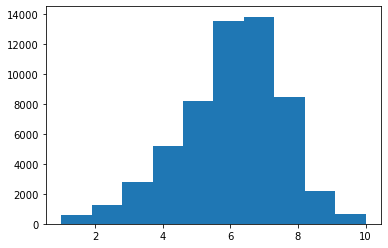

In [52]:
# Histograma com a média de avaliações
plt.hist(games["average_rating"])
plt.show()

Correlação

In [53]:
games.corr()["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

Obtém todas as colunas do dataframe

In [54]:
colunas = games.columns.tolist()

Filtra as colunas e remove as que não são relevantes

In [55]:
colunas = [c for c in colunas if c not in ["bayes_average_rating", "average_rating", "type", "name"]]

Preparando a variável target, a que será prevista

In [56]:
target = "average_rating"

Gerando os dados de treino

In [57]:
df_treino = games.sample(frac = 0.8, random_state = 101)

Seleciona tudo que não está no dataset de treino e armazena no dataset de teste

In [58]:
df_teste = games.loc[~games.index.isin(df_treino.index)]

In [59]:
print(df_treino.shape)
print(df_teste.shape)

(45515, 20)
(11379, 20)


Criando um Regressor

In [60]:
reg_v1 = LinearRegression()

Fit the model to the training data.

In [61]:

modelo_v1 = reg_v1.fit(df_treino[colunas], df_treino[target])

In [62]:
modelo_v1

LinearRegression()

### Fazendo previsões

In [63]:
previsoes = modelo_v1.predict(df_teste[colunas])

In [64]:
mean_squared_error(previsoes, df_teste[target])

1.8266209048760136

### Criando um regressor Random Forest

In [65]:
reg_v2 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101)

In [66]:
modelo_v2 = reg_v2.fit(df_treino[colunas], df_treino[target])

In [67]:
previsoes = modelo_v2.predict(df_teste[colunas])

In [68]:
mean_squared_error(previsoes, df_teste[target])

1.3954102582085597